# Grayscale Image Colorization

In [2]:
# Import libraries
import os
import sys
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint
# from tqdm.notebook import tqdm

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from itertools import chain
import skimage
from PIL import Image
from skimage.util import crop, pad
from skimage.morphology import label
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb
from skimage.io import imsave

import keras
from keras.layers import *
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K
from keras.engine import Layer
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import Adam
import tensorflow as tf

from time import time
from PIL import Image, ImageFile


import warnings
warnings.filterwarnings('ignore', category=UserWarning)


/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/iconography/322.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/iconography/234.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/iconography/730.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/iconography/260.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/iconography/66.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/iconography/294.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/iconography/267.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/iconography/452.jpg
/kaggle/input/art-images-drawings

/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/1846.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/0608.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/0639.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/0940.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/2040.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/2348.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/2026.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/1824.jpg
/kaggle/input/art-images-drawings-painting-sculp

/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/2167.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/1819.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/0091.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/1320.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/1443.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/1487.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/0858.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/painting/0463.jpg
/kaggle/input/art-images-drawings-painting-sculp

/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 613.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 654.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 1165.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/322.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 1352.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 937.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 854.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 785.jpeg
/ka

/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/458.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/648.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/364.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 758.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 1041 20.26.19.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 752.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 871.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/i - 1546.jpeg
/kag

/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/i - 1003 20.26.47.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/i - 613.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/i - 654.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/i - 1165.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/i - 218 20.26.46.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/322.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/i - 1352.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/5783_mainfoto

/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/i - 613.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/i - 654.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/i - 1165.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/i - 937.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/i - 854.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/i - 785.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/images (27) 20.25.37.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/i - 62.jpeg
/kaggle/inp

/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/i - 414.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/i - 506.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/124.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/i - 489.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/152.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/231.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/i - 112.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/i - 340.jpeg
/kaggle/input/art-images-drawi

/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/1846.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/0608.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/0639.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/2040.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/2348.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/2026.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/1824.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/2349.jpg
/kaggle/input/art-images-drawings-painting-sculpture-eng

/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/iconography/i - 945.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/iconography/269.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/iconography/i - 776.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/iconography/272.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/iconography/i - 86.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/iconography/i - 1073 20.26.19.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/iconography/i - 63.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/iconography

In [2]:
path1 = "../input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/drawings/"
path2 = "../input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/"
path3 = "../input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/iconography/"
path4 = "../input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/"
path5 = "../input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/"
image_size = 256
path = [path4] # you can add more path if you have higher RAM

In [20]:
# getting train data ready
train_X = []
for p in path:
    for file in tqdm(os.listdir(p)):
        try:
            img = cv2.imread(p+file)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (256,256))
            train_X.append(img)
        except:
            pass
train_X = np.array(train_X).astype('float32') / 255.

100%|██████████| 2128/2128 [00:05<00:00, 403.00it/s]


In [21]:
train_X.shape

(2041, 256, 256, 3)

In [3]:
# Download and define the Inception_v2 model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
inception = InceptionResNetV2(weights='imagenet', include_top=True)

Define the Model (Autoencoder)

In [23]:
def autoencoder():
    embed_input = Input(shape=(1000,))
    
    #Encoder Part
    encoder_input = Input(shape=(256, 256, 1,))
    encoder_output = Conv2D(128, (3,3), activation='relu', padding='same',strides=1)(encoder_input)
    encoder_output = MaxPooling2D((2, 2), padding='same')(encoder_output)
    encoder_output = Conv2D(128, (4,4), activation='relu', padding='same')(encoder_output)
    encoder_output = Conv2D(128, (3,3), activation='relu', padding='same',strides=1)(encoder_output)
    encoder_output = MaxPooling2D((2, 2), padding='same')(encoder_output)
    encoder_output = Conv2D(256, (4,4), activation='relu', padding='same')(encoder_output)
    encoder_output = Conv2D(256, (3,3), activation='relu', padding='same',strides=1)(encoder_output)
    encoder_output = MaxPooling2D((2, 2), padding='same')(encoder_output)
    encoder_output = Conv2D(256, (4,4), activation='relu', padding='same')(encoder_output)
    encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
    encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
    
    #Fusion Part
    fusion_output = RepeatVector(32 * 32)(embed_input) 
    fusion_output = Reshape(([32, 32, 1000]))(fusion_output)
    fusion_output = concatenate([encoder_output, fusion_output], axis=3) 
    fusion_output = Conv2D(256, (1, 1), activation='relu', padding='same')(fusion_output)
    
    #Decoder Part
    decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(fusion_output)
    decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = UpSampling2D((2, 2))(decoder_output)
    decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = UpSampling2D((2, 2))(decoder_output)
    decoder_output = Conv2D(64, (4,4), activation='relu', padding='same')(decoder_output)
    decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = Conv2D(32, (2,2), activation='relu', padding='same')(decoder_output)
    decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
    decoder_output = UpSampling2D((2, 2))(decoder_output)
    return Model(inputs=[encoder_input, embed_input], outputs=decoder_output)

model = autoencoder()
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_625 (Conv2D)             (None, 256, 256, 128 1280        input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_15 (MaxPooling2D) (None, 128, 128, 128 0           conv2d_625[0][0]                 
__________________________________________________________________________________________________
conv2d_626 (Conv2D)             (None, 128, 128, 128 262272      max_pooling2d_15[0][0]           
_______________________________________________________________________________________

Generating Training Data and Creating Embedding for inception model

In [4]:
# Keras Image generator
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

#Create embedding
def inception_embedding(gray_rgb):
    def resize_gray(x):
        return resize(x, (299, 299, 3), mode='constant')
    rgb = np.array([resize_gray(x) for x in grayrgb])
    rgb = preprocess_input(rgb)
    embed = inception.predict(rgb)
    return embed

In [1]:
# train data
def gen_train(dataset=train_X, batch_size = 20):
    for batch in datagen.flow(dataset, batch_size=batch_size):
        X_batch = rgb2gray(batch)
        rgb = gray2rgb(X_batch)
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        X_batch = X_batch.reshape(X_batch.shape+(1,))
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield [X_batch, inception_embedding(rgb)], Y_batch

In [25]:
# learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
# Saving Model
filepath = "Model.h5"
checkpoint = ModelCheckpoint(filepath,
                             save_best_only=True,
                             monitor='loss',
                             mode='min')
# Callbacks function
model_callbacks = [learning_rate_reduction,checkpoint]

Start the training and Monitor the loss

In [26]:
# Fit the train data
BATCH_SIZE = 20
model.fit_generator(gen_train(train_X,BATCH_SIZE),
            epochs=30,
            verbose=1,
            steps_per_epoch=train_X.shape[0]/BATCH_SIZE,
             callbacks=model_callbacks
                   )

Epoch 1/30
103/102 [==============================] - 101s 978ms/step - loss: 0.0144
Epoch 2/30
103/102 [==============================] - 102s 988ms/step - loss: 0.0049
Epoch 3/30
103/102 [==============================] - 102s 990ms/step - loss: 0.0048
Epoch 4/30
103/102 [==============================] - 102s 990ms/step - loss: 0.0047
Epoch 5/30
103/102 [==============================] - 101s 985ms/step - loss: 0.0046
Epoch 6/30
103/102 [==============================] - 103s 996ms/step - loss: 0.0044
Epoch 7/30
103/102 [==============================] - 103s 1s/step - loss: 0.0044
Epoch 8/30
103/102 [==============================] - 102s 992ms/step - loss: 0.0043
Epoch 9/30
103/102 [==============================] - ETA: 0s - loss: 0.0045
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
103/102 [==============================] - 102s 991ms/step - loss: 0.0045
Epoch 10/30
103/102 [==============================] - 102s 993ms/step - loss: 0.0043
Epoch 

In [5]:
# Load and Import the model
from tensorflow import keras
model = keras.models.load_model('Model.h5')

In [ ]:
Predictions

In [10]:
# Prediction on the test data
TestImagePath="../input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/validation_set/drawings/"

test = []

for file in tqdm(os.listdir(TestImagePath)):
    try:
        img = cv2.imread(TestImagePath+file)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256,256))
        test.append(img)
    except:
        pass
test = np.array(test).astype('float32') / 255.

im = gray2rgb(rgb2gray(test))
im_embed = inception_embedding(im)
im = rgb2lab(im)[:,:,:,0]
im = im.reshape(im.shape+(1,))

pred = model.predict([im, im_embed])
pred = pred * 128

decodings = np.zeros((len(pred),256, 256, 3))

for i in range(len(pred)):
    pp = np.zeros((256, 256, 3))
    pp[:,:,0] = im[i][:,:,0]
    pp[:,:,1:] = pred[i]
    decodings[i] = lab2rgb(pp)
    cv2.imwrite("img_"+str(i)+".jpg", lab2rgb(pp))

100%|██████████| 17/17 [00:00<00:00, 229.52it/s]


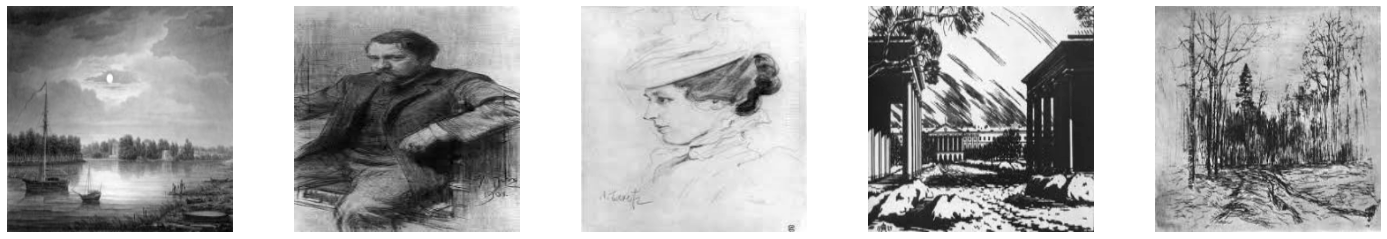

In [11]:
 # grayscale
plt.figure(figsize=(40, 10))
for i in range(5):
    plt.subplot(3, 10, i + 1)
    plt.imshow(rgb2gray(test)[i].reshape(256, 256))
    plt.gray()
    plt.axis('off')
    
plt.tight_layout()
plt.show()

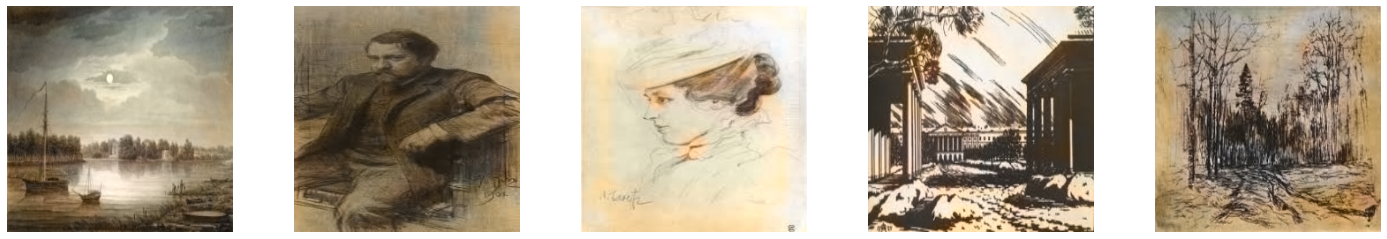

In [12]:
# recolored
plt.figure(figsize=(40, 10))
for i in range(5):
    plt.subplot(3, 10, i + 1 +10)
    plt.imshow(decodings[i].reshape(256, 256,3))
    plt.axis('off')
     
plt.tight_layout()
plt.show()

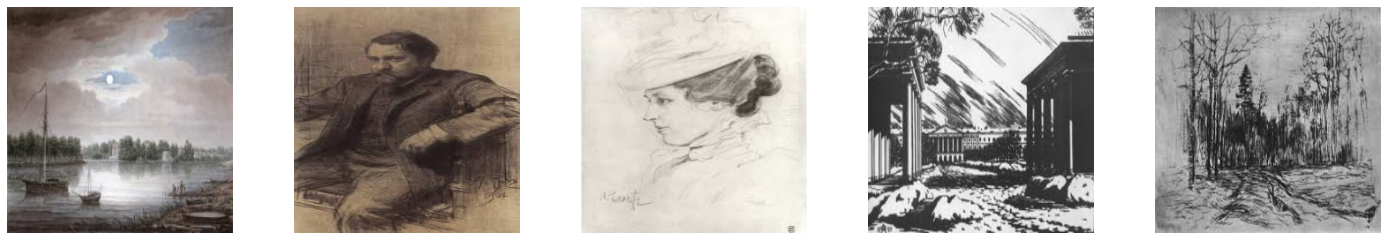

In [13]:
# original
plt.figure(figsize=(40, 10))
for i in range(5):
    plt.subplot(3, 10, i + 1 + 20)
    plt.imshow(test[i].reshape(256, 256,3))
    plt.axis('off')
     
plt.tight_layout()
plt.show()